In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset (assuming you're using the UCI Heart Disease dataset)
data = '/content/heart_disease_dataset.csv'
df = pd.read_csv(data)

# Display first few rows to check the data
print(df.head())


   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70      

In [11]:
# Handle missing values (drop or fill with median/mean for numerical, mode for categorical)
df = df.dropna()  # Drop rows with any missing values (or choose to fill if necessary)

# Encoding categorical features using pandas map or get_dummies (depending on the number of categories)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking'] = df['Smoking'].map({'Current': 1, 'Never': 0, 'Former': 2})
df['Alcohol Intake'] = df['Alcohol Intake'].map({'Heavy': 1, 'Moderate': 2, 'NaN': 0})
df['Family History'] = df['Family History'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'Yes': 1, 'No': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].map({
    'Atypical Angina': 0,
    'Typical Angina': 1,
    'Non-anginal Pain': 2,
    'Asymptomatic': 3
})

# Checking data types and null values after preprocessing
print(df.info())

# Split the dataset into features (X) and target (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']


<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 997
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      660 non-null    int64
 1   Gender                   660 non-null    int64
 2   Cholesterol              660 non-null    int64
 3   Blood Pressure           660 non-null    int64
 4   Heart Rate               660 non-null    int64
 5   Smoking                  660 non-null    int64
 6   Alcohol Intake           660 non-null    int64
 7   Exercise Hours           660 non-null    int64
 8   Family History           660 non-null    int64
 9   Diabetes                 660 non-null    int64
 10  Obesity                  660 non-null    int64
 11  Stress Level             660 non-null    int64
 12  Blood Sugar              660 non-null    int64
 13  Exercise Induced Angina  660 non-null    int64
 14  Chest Pain Type          660 non-null    int64
 15  Heart Disea

<ipython-input-11-8a18aa72a80e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
<ipython-input-11-8a18aa72a80e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking'] = df['Smoking'].map({'Current': 1, 'Never': 0, 'Former': 2})
<ipython-input-11-8a18aa72a80e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Accuracy: 0.8560606060606061
Confusion Matrix:
[[65  8]
 [11 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        73
           1       0.86      0.81      0.83        59

    accuracy                           0.86       132
   macro avg       0.86      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


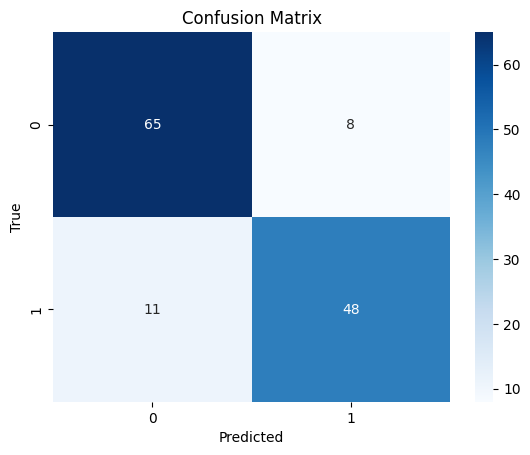

In [14]:
# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
